## 2. Extended Euclidean Algorithm

If the gcd(a, b) = r then there exist integers p and s so that:
p(a) + s(b) = r


### How to format the solution

In [ ]:
def format_solution(flag):
    return print(flag)

### Normal Euclidean Algorithm
recap session 1

In [ ]:
def euclidean_algorithm(a, b):
    while b != 0:
        a, b = b, a % b
    return a

#### Example 1:

In [ ]:
euclidean_algorithm(12, 18)

### Extended Euclidean Algorithm

In [ ]:
def extended_euclidean_algorithm(a, b):
    old_r, r = a, b
    old_s, s = 1, 0
    old_t, t = 0, 1

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t

### Improved code

In [ ]:
def extended_euclidean_algorithm_improved(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        gcd, x, y = extended_euclidean_algorithm(b % a, a)
        return (gcd, y - (b // a) * x, x)

### Solution:

In [ ]:
(gcd, u, v) = extended_euclidean_algorithm_improved(26513, 32321)
if u > v:
    format_solution(v)
else:
    format_solution(u)

## Modular Arithmetic 1 - Theory of congruence
https://cryptohack.org/courses/modular/ma0/

We say that two integers are congruent modulo m if a ≡ b mod m.

Another way of saying this, is that when we divide the integer a by m, the remainder is b. This tells you that if m divides a (this can be written as m | a) then a ≡ 0 mod m.

### Solution

In [ ]:
def solution(x, y):
    return min(x, y)


# 11 ≡ x mod 6
# 8146798528947 ≡ y mod 17

x = 11 % 6
y = 8146798528947 % 17

solution(x, y)

## Modular Arithmetic 2 - Fermat's little theorem
The algebraic structure that emerges from using integers modulo a certain number depends on whether this number is prime or not. If it is prime, we get a field (which has more properties), if it is not, we get a ring (with fewer properties). 

1. Integers modulo p: When we talk about "integers modulo p", we refer to the set of all integers considered within a certain number, called the modulus. In this case, the modulus is a prime number "p". For example, if "p" is 5, the integers modulo 5 would be {0, 1, 2, 3, 4}.

2. A field, denoted Fp: A field is an algebraic structure with operations of addition, subtraction, multiplication, and division (except division by zero) that satisfy certain properties. When "p" is a prime number, the integers modulo "p" form a field. This means that we can add, subtract, multiply, and divide these numbers in a way that respects the standard properties of these operations. The field formed by the integers modulo a prime number "p" is denoted as Fp. `A finite field Fp is the set of integers {0,1,...,p-1}, and under both addition and multiplication there is an inverse element b for every element a in the set, such that a + b = 0 and a * b = 1`

3. A ring if the modulus is not prime: A ring is another algebraic structure, similar to a field but with fewer requirements. If the modulus "n" is not a prime number, then the integers modulo "n" form a ring, not a field. This means that while addition and multiplication are still well-defined and have familiar properties, division might not always be possible.

### Esempi

![Multiplication in mod 5](image.png)
5 is a prime number. The table illustrates that for every non-zero element, there is a pair of numbers that multiply to 1 modulo 5, indicating the existence of multiplicative inverses.

![Multiplication in mod 6](image-1.png)
6 is not a prime number. In this table, you can see that certain elements, like 2 and 3, do not have any number they can multiply with to yield 1 modulo 6. This lack of an inverse for some elements means this system does not form a field. 



### Exercise
Calculate `3ˆ1 mod 17`. Now do the same but with `5ˆ17 mod 17`.
p = 17
a = 3

To calculate `3^17 mod 17`, we can use Fermat's Little Theorem, which states that if `p` is a prime number and `a` is an integer not divisible by `p`, then `a^(p-1) ≡ 1 (mod p)`.

In this case, we're calculating `3^17 mod 17`. Here, `p = 17` and `a = 3`. Note that `3` is not divisible by `17`, so we can apply the theorem. 

According to Fermat's Little Theorem, we would have:
`3^16 ≡ 1 (mod 17)`

Now, to get `3^17`, we multiply both sides of the equation by `3`:

`3 * 3^16 ≡ 3 * 1 (mod 17)`
`3^17 ≡ 3 (mod 17)`

Therefore, `3^17 mod 17` is equal to 3.
`5ˆ17` is equivalent to 5

What would you expect to get for `7ˆ16 mod 17`? Try calculating that.

In [ ]:
# 17 is prime. 7 is not divisible by 17.
# 7ˆ16 ≡ 1 (mod 17)

a = 5
p = 17
exponent = 16
result = 1

for _ in range(exponent):
    result = (result * a) % p

result

## Modular Inverting
For all elemnts `g` in a field `Fp` exists a unique integer `d` such that `g * d ≡ 1 mod p`. `d` is the multiplicative inverse of `g`.

### Challenge 
Example: `7 * 8 = 56 ≡ 1 mod 11`.

What is the inverse element: `3 * d ≡ 1 mod 13`? 

In [ ]:
def solution(number):
	return number

In [ ]:
def operations():
    return {
        "*": lambda x, y: x * y,
        "/": lambda x, y: x / y,
        "+": lambda x, y: x + y,
        "-": lambda x, y: x - y,
    }

In [ ]:
import re


def parse_mod_expression(expr):
    parts = re.findall(r"(\d+|\w+)\s*([\*\/\+\-])\s*(\d+|\w+)", expr)
    modulo_part = re.findall(r"mod\s+(\d+)", expr)

    if not parts or not modulo_part:
        raise ValueError("Invalid expression")

    num_or_var1, operator, num_or_var2 = parts[0]
    modulo = int(modulo_part[0])

    is_num1 = num_or_var1.isdigit()
    is_num2 = num_or_var2.isdigit()

    if not (is_num1 and is_num2):
        return num_or_var1, operator, num_or_var2, None, None, modulo

    num_or_var1 = int(num_or_var1)
    num_or_var2 = int(num_or_var2)

    result = operations()[operator](num_or_var1, num_or_var2)
    result_mod = result % modulo
    return num_or_var1, operator, num_or_var2, result, result_mod, modulo


expr1 = "7 * 8 ≡ 1 mod 11"
components1 = parse_mod_expression(expr1)
print("Espressione con solo numeri:", components1)

expr2 = "3 * d ≡ 1 mod 13"
components2 = parse_mod_expression(expr2)
print("Espressione con una variabile:", components2)

In [ ]:
# Using Fermat's Little Theorem
def multiplicative_inverse_by_Fermat(mod_expression):
    (a, _, _, _, _, mod) = parse_mod_expression(mod_expression)
    return pow(int(a), mod - 2) % mod # this could be rewritten as pow(int(a), mod - 2, mod)


d = multiplicative_inverse_by_Fermat('3 * d ≡ 1 mod 13')
solution(d)

In [ ]:
# def multiplicative_inverse_by_Euclide(mod_expression):
	#return
# TODO

## Quadratic residues
How to take the square root modulo of an integer?
For the elements of F\*p, not every element has a square root. In fact, what we find is that for roughly one half of the elements of Fp\*, there is no square root.

An integer x is a Quadratic Residue if there exists an a such that `a^2 = x mod p`. If there is no such solution, then the integer is a Quadratic Non-Residue.

### NB
For any quadratic residue, there are always two corresponding solutions. This is because the squares of a number 'a' and its negative counterpart '-a' are equal, i.e., \( a^2 = (-a)^2 \).

### Challenge
In the below list there are two non-quadratic residues and one quadratic residue.

Find the quadratic residue and then calculate its square root. Of the two possible roots, submit the smaller one as the flag.
```
p = 29
ints = [14, 6, 11]
```

In [ ]:
def solution(a, b):
    if a < b:
        return a
    else:
        b

### Euler's Criterion

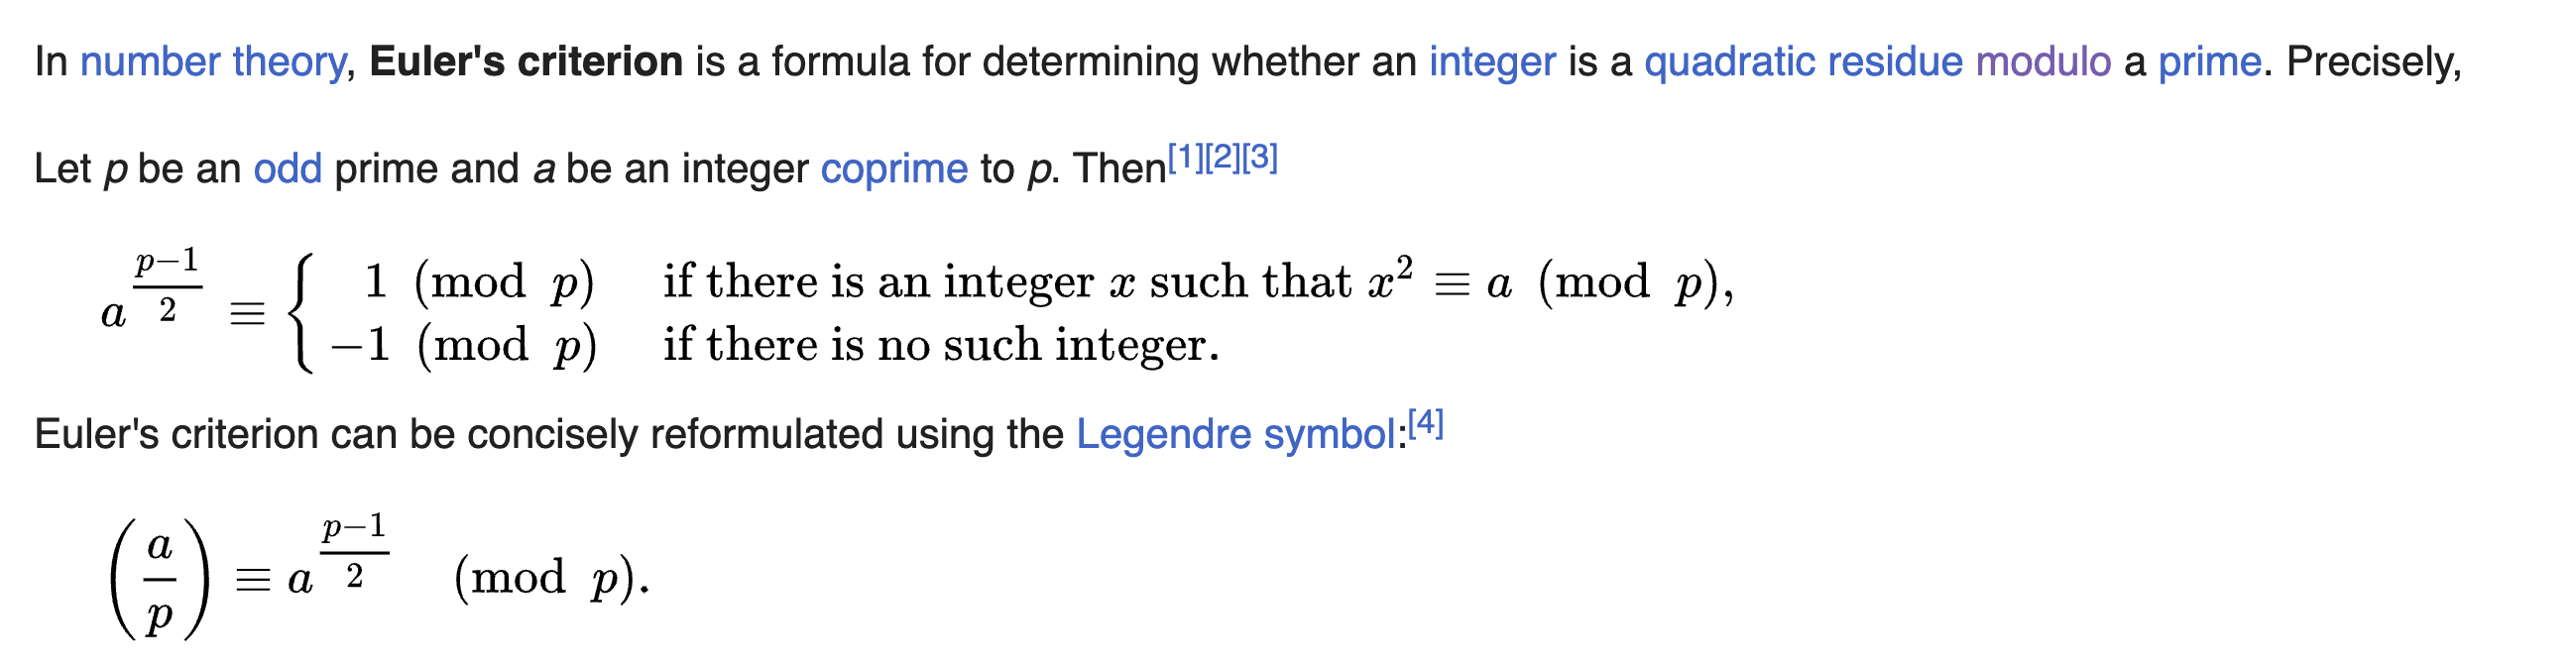

In [6]:
def is_quadratic_residue(x, p):
    return pow(x, (p - 1) // 2, p) == 1


def sqrt_mod(a, p):
    for r in range(p):
        if (r * r) % p == a:
            return r

In [9]:
# a^2 = x mod p
p = 29
ints = [14, 6, 11]

quadratic_residue = [x for x in ints if is_quadratic_residue(x, p)]

sqrt = sqrt_mod(quadratic_residue[0], p)

print(sqrt)

8 [6]
